# Python 音解析
- 自分用：conda googleの環境でやる
- https://jorublog.site/python-voice-analysis/


In [33]:
import sys
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [3]:
# ffmpegを使ってmp4からwavを作る
# !ffmpeg -i comparison.mp4  -ac 2 -ar 44100 -vn comparison_audio.wav
# !ffmpeg -i videos/shift_noring.mp4  -ac 2 -ar 44100 -vn videos/shift_noring_audio.wav
#!ffmpeg -i videos/shift_withring.mp4  -ac 2 -ar 44100 -vn videos/shift_withring_audio.wav

ffmpeg version 3.4 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 7.2.0 (GCC)
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-bzlib --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-cuda --enable-cuvid --enable-d3d11va --enable-nvenc --enable-dxva2 --enable-avisynth --enable-libmfx
  libavutil      55. 78.100 / 55. 78.100
  libavcodec     57.107.100 / 57.107.100
  libavformat    57. 83.100 / 57. 83.100
  libavdevice    57. 10.100 / 57. 10.100
  libavfilter     6.107.100 /  6.107.100
  libswscale      4.  8.100 /  4.  8.100
  libswresampl

まずは読み込みを行う。
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

サンプルレートとデータ（ステレオ音の場合は2列）を読み込む。ファイルの仕様によるが，音の強弱には正規化いたりいなかったりする。今回は16bit符号付き整数となっているので正規化の手順が入る。

In [23]:
#音声ファイル読み込み
wav_filename = "videos/shift_noring_audio.wav"
rate1, data1 = scipy.io.wavfile.read(wav_filename)

wav_filename = "videos/shift_withring_audio.wav"
rate2, data2 = scipy.io.wavfile.read(wav_filename)

#縦軸（振幅）の配列を作成   #16bitの音声ファイルのデータを-1から1に正規化
data1 = data1 / 32768
data2 = data2 / 32768

In [69]:
### Librosaでも読めるけどなにか違う？
librosa.load(wav_filename)

## 謎のエラーで実行できなかったorz
## 参照；https://github.com/pyca/pynacl/issues/474

AttributeError: cffi library 'C:\Users\hkedw\AppData\Local\conda\conda\envs\google\Library\bin\sndfile.dll' has no function, constant or global variable named 'sf_wchar_open'

C:\Users\hkedw\AppData\Local\conda\conda\envs\google\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


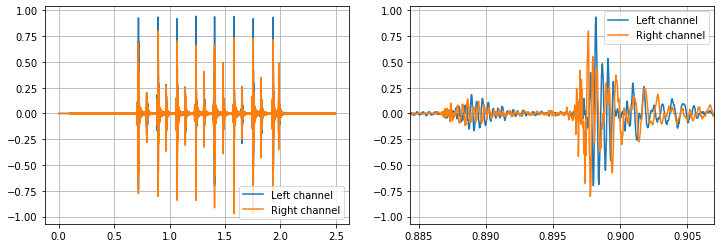

In [72]:
##### 音声データをそのまま表示する ##### ステレオなので2音収録される。左右の順。

#横軸（時間）の配列を作成　　#np.arange(初項, 等差数列の終点, 等差)
time1 = np.arange(0, data1.shape[0]/rate1, 1/rate1)  
#データプロット
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(time1, data1[:, 0], label="Left channel")
plt.plot(time1, data1[:, 1], label="Right channel")
plt.legend()
plt.grid()
# 拡大 Plot
plt.subplot(1,2,2)
plt.plot(time1, data1[:, 0], label="Left channel")
plt.plot(time1, data1[:, 1], label="Right channel")
plt.legend()
plt.grid()
plt.xlim(39000/rate1, 40000/rate1)
plt.show()

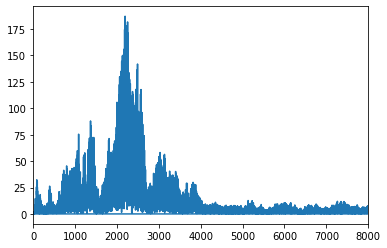

[array([ 0.        ,  0.40064321,  0.80128642, ..., -1.20192963,
        -0.80128642, -0.40064321]),
 array([1.45501709, 0.31450326, 1.0201214 , ..., 0.2068622 , 1.0201214 ,
        0.31450326])]

In [40]:
##### 周波数成分を表示する #####
def showfft(data,rate):
    #縦軸：dataを高速フーリエ変換する（時間領域から周波数領域に変換する）
    fft_data = np.abs(np.fft.fft(data))    
    #横軸：周波数の取得　　#np.fft.fftfreq(データ点数, サンプリング周期)
    freqList = np.fft.fftfreq(data.shape[0], d=1.0/rate)  
    #データプロット
    plt.plot(freqList, fft_data)
    plt.xlim(0, 8000) #0～8000Hzまで表示
    plt.show()
    return [freqList, fft_data]

showfft(data1[:,0],rate1)

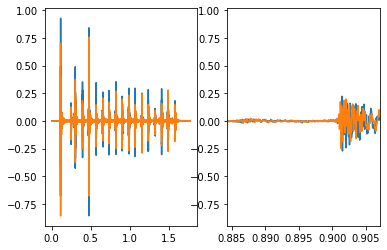

In [26]:
##### 音声データをそのまま表示する #####

#横軸（時間）の配列を作成　　#np.arange(初項, 等差数列の終点, 等差)
time2 = np.arange(0, data2.shape[0]/rate2, 1/rate2)  
#データプロット
plt.figure()
plt.subplot(1,2,1)
plt.plot(time2, data2)
# 拡大 Plot
plt.subplot(1,2,2)
plt.plot(time2, data2)
plt.xlim(39000/rate2, 40000/rate2)
plt.show()

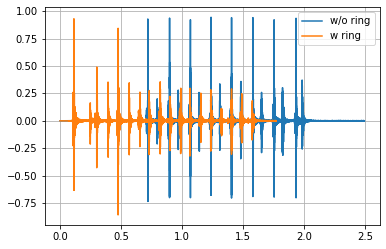

In [78]:
plt.figure()
plt.plot(time1,data1[:,0],label='w/o ring')
plt.plot(time2,data2[:,0],label='w ring')
plt.legend()
plt.grid()

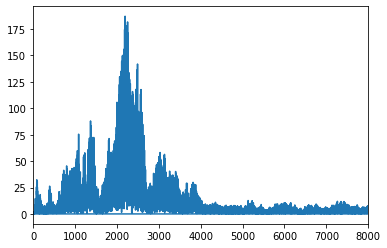

In [44]:
freqList1, fft_data1 = showfft(data1[:,0],rate1)

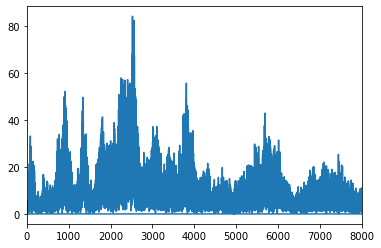

In [45]:
freqList2, fft_data2 = showfft(data2[:,0],rate2)

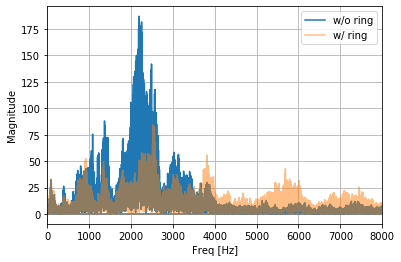

In [56]:
plt.figure()
plt.plot(freqList1,fft_data1,alpha = 1,label="w/o ring")
plt.plot(freqList2,fft_data2,alpha = 0.5,label="w/ ring")
plt.xlim(0, 8000) #0～8000Hzまで表示
plt.xlabel("Freq [Hz]")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()

TODOS
- data1と2の絶対値は参考になるのか？
- 波形のところを合わせたい：onset detectionというらしい。
- FFTの違いが出るのはなぜ？


## 音声立ち上がりの検出と音領域の抽出

In [57]:
# １．包絡線をヒルベルト変換から得る
# https://org-technology.com/posts/Hilbert-transform.html

hdata1=scipy.signal.hilbert(data1[:,0])
hdata2=scipy.signal.hilbert(data2[:,0])


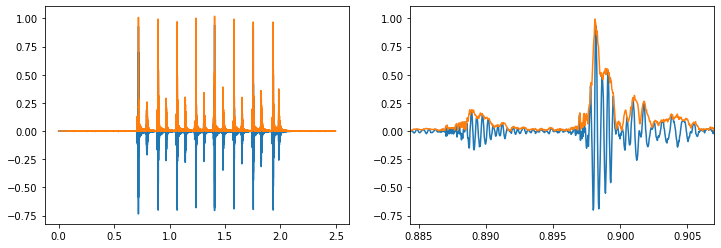

In [67]:
#データプロット
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(time1, data1[:,0], time1,abs(hdata1))
# 拡大 Plot
plt.subplot(1,2,2)
plt.plot(time1, data1[:,0],time1,abs(hdata1))
plt.xlim(39000/rate1, 40000/rate1)
plt.show()

In [77]:
# 参考 http://kiefer.hatenablog.com/entry/2017/03/14/%E9%9F%B3%E3%81%AE%E9%96%8B%E5%A7%8B%E5%9C%B0%E7%82%B9%EF%BC%88%E3%82%AA%E3%83%B3%E3%82%BB%E3%83%83%E3%83%88%EF%BC%89%E3%81%AE%E6%A4%9C%E5%87%BA
onset_frames = librosa.onset.onset_detect(data1[:,0],rate1, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames)

onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

onset_samples =librosa.frames_to_samples(onset_frames)
print(onset_samples)

[ 62  69  77  84  92  99 107 114 121 128 137 143 151 158 167 172]
[1.43963719 1.60217687 1.78793651 1.95047619 2.13623583 2.29877551
 2.48453515 2.64707483 2.80961451 2.9721542  3.18113379 3.32045351
 3.50621315 3.66875283 3.87773243 3.9938322 ]
[31744 35328 39424 43008 47104 50688 54784 58368 61952 65536 70144 73216
 77312 80896 85504 88064]


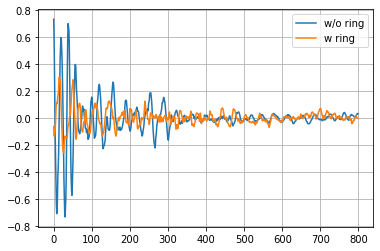

In [85]:
onset1=librosa.frames_to_samples(librosa.onset.onset_detect(data1[:,0],rate1, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1))
onset2=librosa.frames_to_samples(librosa.onset.onset_detect(data2[:,0],rate1, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1))

winlen = 800
    
#figure
plt.figure()
plt.plot(data1[onset1[0]:onset1[0]+winlen,0],label='w/o ring')
plt.plot(data2[onset2[0]:onset2[0]+winlen,0],label='w ring')
plt.legend()
plt.grid()

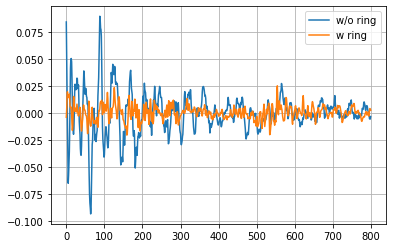

In [86]:
#figure
plt.figure()
plt.plot(data1[onset1[1]:onset1[1]+winlen,0],label='w/o ring')
plt.plot(data2[onset2[1]:onset2[1]+winlen,0],label='w ring')
plt.legend()
plt.grid()

## Spectrometerの図

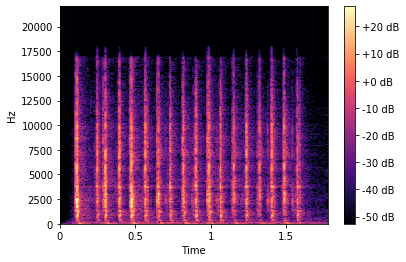

In [34]:
def showspectro(data,rate):
    # フレーム長
    fft_size = 1024                 
    # フレームシフト長 
    hop_length = int(fft_size / 4)  


    # 短時間フーリエ変換実行
    amplitude = np.abs(librosa.core.stft(data, n_fft=fft_size, hop_length=hop_length))

    # 振幅をデシベル単位に変換
    log_power = librosa.core.amplitude_to_db(amplitude)

    # グラフ表示
    librosa.display.specshow(log_power, sr=rate, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format='%+2.0f dB')  
    plt.show()
    
showspectro(data2[:,0],rate2)

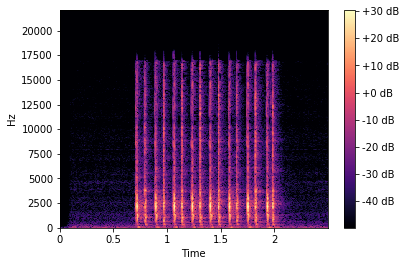

In [35]:
showspectro(data1[:,0],rate1)